In [1]:
import nltk
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=120)

In [2]:
sentences=['I enjoy flying','I like NLP','I like deep learning']

In [3]:
vocab=list(set((" ".join(sentences)).split()))

In [4]:
text_data=[]
for i in sentences:
    text_data.append(i.split())

In [5]:
def MinWords():
    numWords = [len(sentence.split()) for sentence in sentences]
    return min(numWords)

In [6]:
MinWords()

3

In [7]:
def win_size():
    win_size=int(input('Enter window size: '))
    if(MinWords()<=win_size):
        print('operation not possible,select a smaller window_size')
        win_size()
    else:
        return win_size

In [8]:
window_size=win_size()

Enter window size: 1


In [9]:
w=[]
for i in sentences:
    i=i.split(' ') #if i is list
    for k in range(len(i)-window_size+1):
        for l in range(k+1,k+window_size+1):
            if l<=len(i)-1:
                w.append([i[k],i[l]])

In [10]:
len(w)

7

In [11]:
w1=[x[::-1] for x in w]
w.extend(w1)

In [12]:
len(w)

14

In [13]:
a=np.zeros((len(vocab),len(vocab)))

In [14]:
df=pd.DataFrame(a,index=vocab,columns=vocab)

In [15]:
for i in w:
    df.at[i[0],i[1]]+=1

In [16]:
#Co-occurence matrix
df

,NLP,flying,I,like,deep,learning,enjoy
NLP,0.0,0.0,0.0,1.0,0.0,0.0,0.0
flying,0.0,0.0,0.0,0.0,0.0,0.0,1.0
I,0.0,0.0,0.0,2.0,0.0,0.0,1.0
like,1.0,0.0,2.0,0.0,1.0,0.0,0.0
deep,0.0,0.0,0.0,1.0,0.0,1.0,0.0
learning,0.0,0.0,0.0,0.0,1.0,0.0,0.0
enjoy,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [17]:
from numpy import array
from scipy.linalg import svd
from numpy import diag
from numpy import dot
# define a matrix
A = array(df)
print('Matrix A is: \n')
print(A)
# SVD
U, s, VT = svd(A)
print('*'*120)
print('Matrix U is: \n')
print(U)
print('*'*120)
Sigma = diag(s)
print('Matrix Sigma is: \n')
print(Sigma)
print('*'*120)
print('Matrix VT is: \n')
print(VT)

Matrix A is: 

[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 2. 0. 0. 1.]
 [1. 0. 2. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0.]]
************************************************************************************************************************
Matrix U is: 

[[ 3.47197522e-01  0.00000000e+00  0.00000000e+00 -1.94288659e-01  0.00000000e+00  4.18376781e-01  8.16496581e-01]
 [ 1.39662213e-01 -5.55111512e-17 -9.99200722e-16  6.73987697e-01  6.66133815e-16 -5.99640212e-01  4.08248290e-01]
 [ 8.34057257e-01 -3.46944695e-18 -5.55111512e-16  2.85410380e-01  8.88178420e-16  2.37113351e-01 -4.08248290e-01]
 [-1.11022302e-16 -9.16756682e-01  2.31803980e-01 -5.55111512e-17  3.25306166e-01 -5.55111512e-17  1.11022302e-16]
 [ 4.05335466e-01  0.00000000e+00  0.00000000e+00 -6.53095258e-01  0.00000000e+00 -6.39663774e-01 -2.22044605e-16]
 [ 1.10328413e-15 -1.53510165e-01  5.47397857e-01  1.16573418e-15 -8.22672605e-01 -4.99600361e-16  2.7755

In [18]:
U.shape,Sigma.shape,VT.shape

((7, 7), (7, 7), (7, 7))

In [19]:
k=int(input('Enter k: '))
if(k>len(vocab) or k<1):
    print('operation not possible, select a k between 1 and ',len(vocab))
    raise SystemExit("Stop right there!")

Enter k: 3


In [20]:
U=U[:,:k]
Sigma=Sigma[:k,:k]
VT=VT[:k,:]

In [21]:
U.shape,Sigma.shape,VT.shape

((7, 3), (3, 3), (3, 7))

In [22]:
U_df=pd.DataFrame(U,index=vocab)
U_df

,0,1,2
NLP,3.471975e-01,0.000000e+00,0.000000e+00
flying,1.396622e-01,-5.551115e-17,-9.992007e-16
I,8.340573e-01,-3.469447e-18,-5.551115e-16
like,-1.110223e-16,-9.167567e-01,2.318040e-01
deep,4.053355e-01,0.000000e+00,0.000000e+00
learning,1.103284e-15,-1.535102e-01,5.473979e-01
enjoy,-1.249001e-16,-3.687707e-01,-8.041284e-01


In [23]:
model={}
c=0
for i in list(U_df.index):
    model[i]=list(U_df.loc[i])
    c=c+1

In [24]:
model

{'NLP': [0.34719752179140906, 0.0, 0.0],
 'flying': [0.13966221294354333,
  -5.551115123125783e-17,
  -9.992007221626409e-16],
 'I': [0.8340572565263615, -3.469446951953614e-18, -5.551115123125783e-16],
 'like': [-1.1102230246251565e-16, -0.9167566816845836, 0.2318039795131881],
 'deep': [0.4053354659702687, 0.0, 0.0],
 'learning': [1.1032841307212493e-15, -0.1535101647914284, 0.5473978574979729],
 'enjoy': [-1.249000902703301e-16, -0.36877068198594637, -0.8041284105716443]}

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline


def display_pca_scatterplot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()
        
        
def display_tsne_scatterplot(model, words=None, sample=0):
    word_vectors = np.array([model[w] for w in words])
    twodim = TSNE().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(15,15))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.savefig("test.png")
    plt.show()

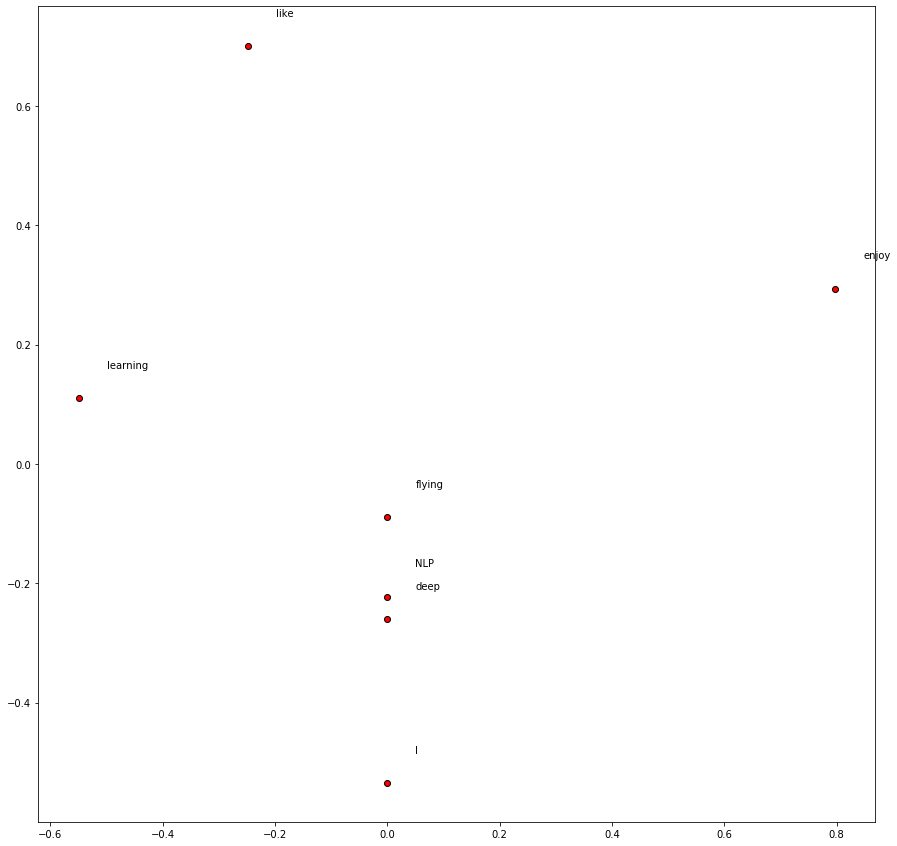

In [26]:
display_pca_scatterplot(model,list(U_df.index))

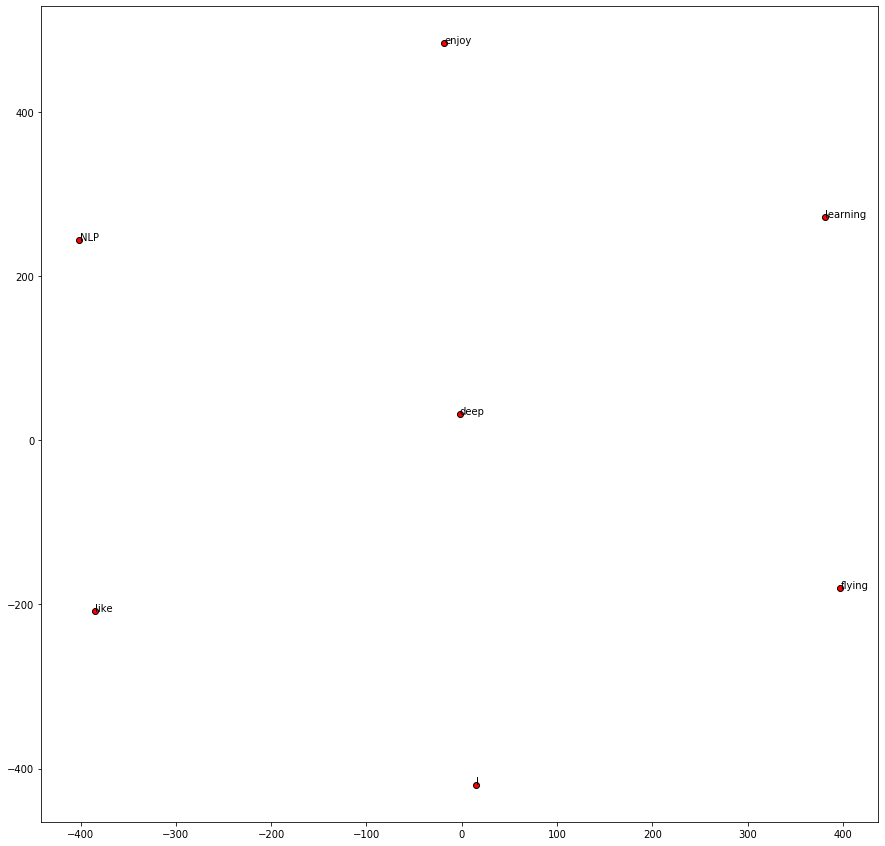

In [27]:
display_tsne_scatterplot(model,list(U_df.index))